In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pip install tueplots
from tueplots import bundles

In [3]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)
print()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


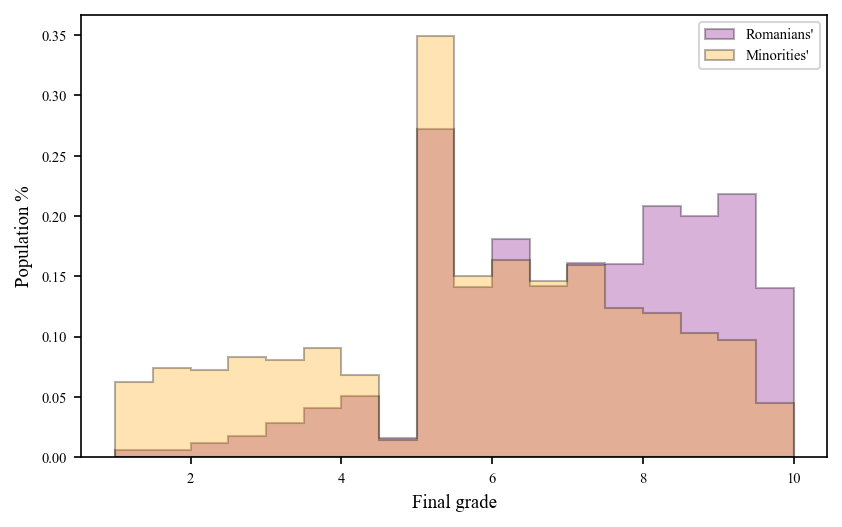

In [4]:
# Plot the distribution of the Romanian exam grades.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] > -1)]
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] > -1)]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.hist(romanian_only_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
    ax.hist(romanian_plus_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
    
    ax.legend(["Romanians'", "Minorities'"])
    ax.set_xlabel("Final grade")
    ax.set_ylabel("Population %")

    plt.show()
    fig.savefig('../doc/plots/exp4_grade_distrib.png', bbox_inches='tight')


In [7]:
print(romanian_only_results['romanian_written_final'].mean())
print(romanian_plus_results['romanian_written_final'].mean())
print(romanian_only_results['romanian_written_final'].mean() - romanian_plus_results['romanian_written_final'].mean())

def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    s1 = np.std(x1, ddof=1)
    s2 = np.std(x2, ddof=1)
    pooled_std = np.sqrt((((n1 - 1) * s1 ** 2) + ((n1 - 1) * s1 ** 2)) / (n1 + n2 - 2))
    return (np.mean(x1) - np.mean(x2)) / pooled_std

print(cohen_d(romanian_only_results['romanian_written_final'].to_numpy(), romanian_plus_results['romanian_written_final'].to_numpy()))

7.06018228028413
5.744183625912699
1.3159986543714313
0.5232148269460704
